# Question 1
Compute a sample path of a Brownian motion at all resolutions $(h_i, i = 1, . . . , 10)$ with $h_i = 2^{-i}$
based on the same noise. Plot your result and explain 

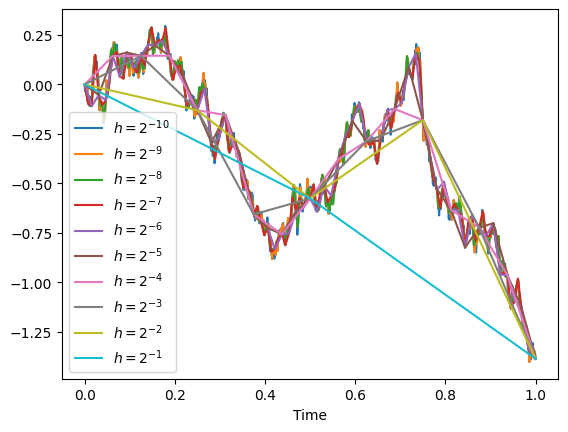

In [4]:
#Question 1
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(123)
res = 10
h=2**-res
eta= np.random.randn(2**res)*np.sqrt(h) # N(0,h)
fig, ax = plt.subplots()
for i in range(res): 
    h = 2**-(res-i)
    W = np.zeros(2**(res-i)+1)
    for j in range(len(W)-1):
        W[j+1] = W[j] + eta[j]
    
    ax.plot(np.arange(0,1+h,h),W,label = r"$h=2^{-%d}$" % (res-i))
    eta = [eta[k]+eta[k+1] for k in range(0,len(eta),2)] 
ax.legend()
ax.set_xlabel('Time')
plt.show()

# Question 2
Let $μ := 2$ and $σ := 1$ and $hi = 2^{-i}$. Compute a sample path of $X$ and sample paths $(X_{h_i} , i =
1, . . . , 10)$ based on the same noise. Plot all results in the same graph. Describe your findings.
What do you observe? Is there a difference to the plot in Question 1?

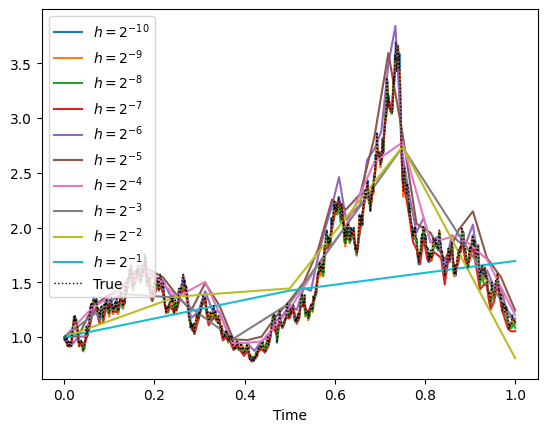

In [10]:
#Question 2
mu=2
sigma = 1
np.random.seed(123)
res = 10
h = 2**-res
eta =np.sqrt(h)*np.random.randn(2**res) # N(0,h)
def Get_X(h,eta):
    W= np.zeros(int(1/h+1)) # Simulation browninan motion at high resolution
    for j in range(len(W)-1):
        W[j+1] = W[j] + eta[j]
    X = np.exp((mu-sigma**2/2)*np.arange(0,1+h,h) + sigma*W)
    return X
def Get_aprox(h,eta):
    Xaprox = np.ones(int(1/h)+1)
    for j in range(len(Xaprox)-1):
        Xaprox[j+1] = Xaprox[j]*(1+h*mu + sigma*eta[j])
    return Xaprox
X = Get_X(h,eta)

fig, ax = plt.subplots()

for i in range(res): 
    h = 2**-(res-i)
    ax.plot(np.arange(0,1+h,h),Get_aprox(h,eta),label = r"$h=2^{-%d}$" % (res-i))
    eta = [eta[k]+eta[k+1] for k in range(0,len(eta),2)] 
h = 2**-10
ax.plot(np.arange(0,1+h,h),X,label ="True",linestyle = 'dotted',c='black',linewidth = 1)
ax.legend()
ax.set_xlabel('Time')
plt.show()

# Question 3

Estimate the strong error with a Monte Carlo simulation based on $M = 1000$ (or more if you like)
for all $(h_i, i = 1, . . . , 10)$. Plot your results with $h$ in the $x$-axis and the strong error in the $y$-axis
in a loglog plot and add a reference slope $h^{1/2}$. Describe your findings.

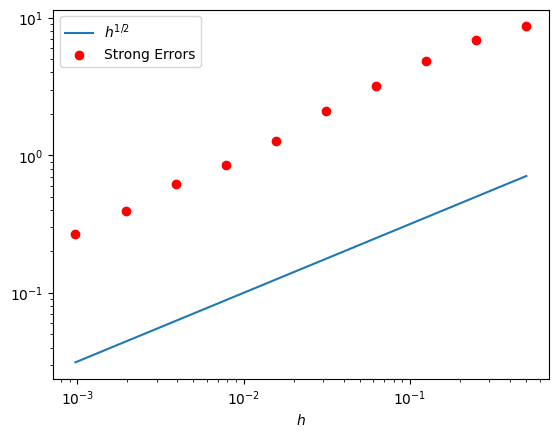

In [3]:
#Question 3
np.random.seed(123)
M=100000
strong_errors = np.zeros(res)
h = np.zeros(res)

for i in range(res):
    h[i] = 2**-(i+1)
    aproxs = np.zeros(M)
    Xs = np.zeros(M)
    for m in range(M):
        eta = np.sqrt(h[i]) * np.random.randn(2**(i+1))
        Xs[m] = Get_X(h[i],eta)[-1]
        aproxs[m] = Get_aprox(h[i],eta)[-1]
    strong_errors[i] = np.sqrt(np.mean((Xs-aproxs)**2))
fig, ax = plt.subplots()
ax.loglog(h,np.sqrt(h), label = r'$h^{1/2}$')
ax.scatter(h,strong_errors,label="Strong Errors",c='r')
ax.legend()
ax.set_xlabel(r"$h$")
plt.show()
    

# Question 4
Estimate the weak error of
$$|E [X(1)] − E [X_h(1)]|$$
with a Monte Carlo simulation based on $M = 1000$ (and as many more as you can compute in a
reasonable time) for all $(h_i, i = 1, . . . , 10)$. Observe that
$E[X(1)] = exp(μ)$.
Plot your results with h in the x-axis and the weak error in the y-axis in a loglog plot and add a
reference slope that behaves as h. Describe your findings.

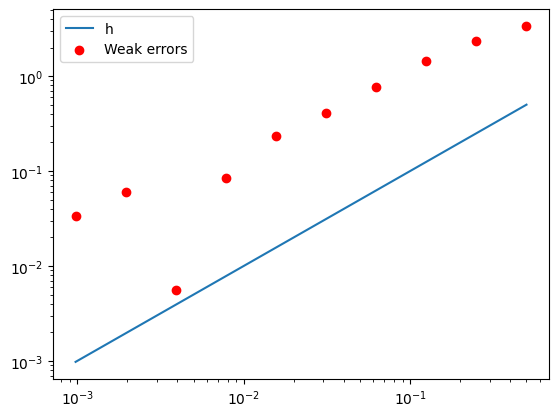

In [4]:
# Question 4
np.random.seed(123)
M=100000
weak_errors = np.zeros(res)
for i in range(res):
    h[i] = 2**-(i+1)
    aproxs = np.zeros(M)
    for m in range(M):
        eta = np.sqrt(h[i]) * np.random.randn(2**(i+1))
        aproxs[m] = Get_aprox(h[i],eta)[-1]
    weak_errors[i] = np.abs(np.exp(mu)-np.mean(aproxs))

fig,ax = plt.subplots()
ax.loglog(h,h,label =r'h')
ax.scatter(h,weak_errors,label = 'Weak errors',c='r')
ax.legend()
plt.show()

# Question 5
Do the same as in Question 4 but choose another test function than ϕ = Id or any linear affine
transformation of it. Plot and describe your results.

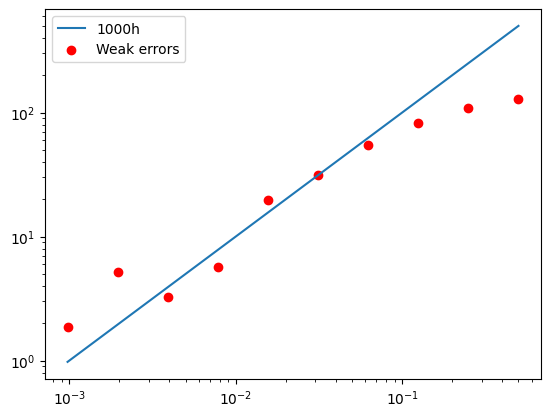

In [5]:
# Question 5
np.random.seed(123)
M=100000
square_weak_errors = np.zeros(res)
for i in range(res):
    h[i] = 2**-(i+1)
    aproxs = np.zeros(M)
    for m in range(M):
        eta = np.sqrt(h[i]) * np.random.randn(2**(i+1))
        aproxs[m] = Get_aprox(h[i],eta)[-1]
    square_weak_errors[i] = np.abs(np.exp(2*mu+sigma**2)-np.mean(aproxs**2))

fig,ax = plt.subplots()
ax.loglog(h,1000*h,label =r'1000h')
ax.scatter(h,square_weak_errors,label = 'Weak errors',c='r')
ax.legend()
plt.show()